In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sns.set_theme(context="poster", style="white", font_scale=0.75)

In [3]:
#dataset = sns.load_dataset("tips")
dataset = pd.read_csv("tips.csv")

In [4]:
dataset.shape

(244, 7)

In [5]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
dataset["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [7]:
dataset["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [8]:
dataset["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [9]:
dataset["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [10]:
dataset.groupby(["sex", "smoker"]).mean()

total_bill       tip      size
sex    smoker                                
Female No       18.105185  2.773519  2.592593
       Yes      17.977879  2.931515  2.242424
Male   No       19.791237  3.113402  2.711340
       Yes      22.284500  3.051167  2.500000

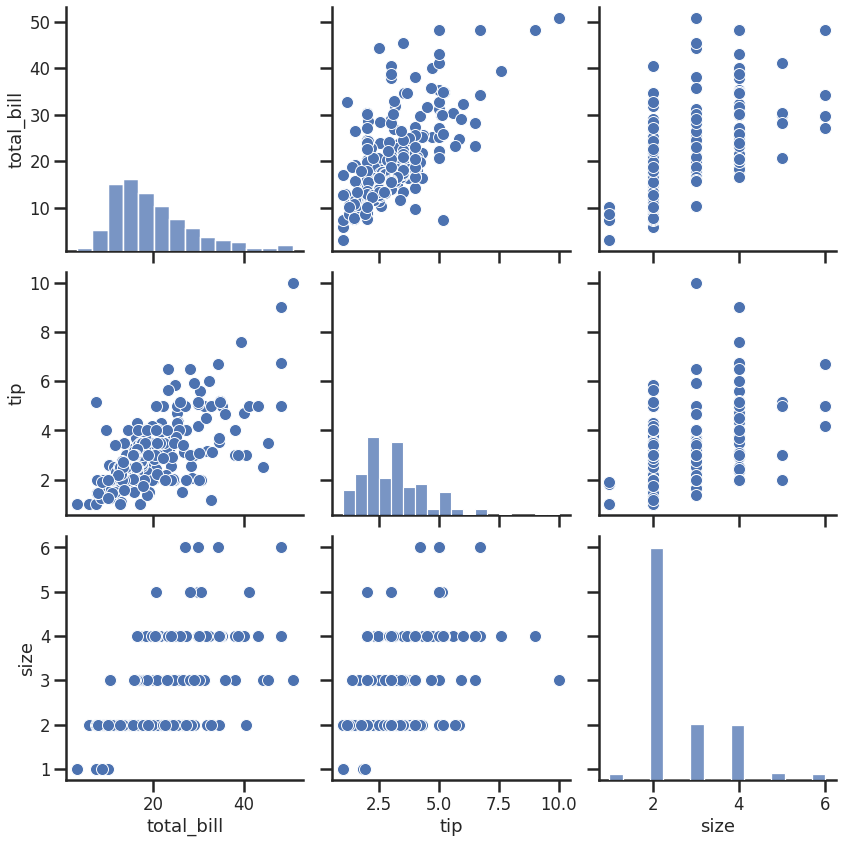

In [11]:
with sns.axes_style("ticks"):
    sns.pairplot(dataset, height=4)

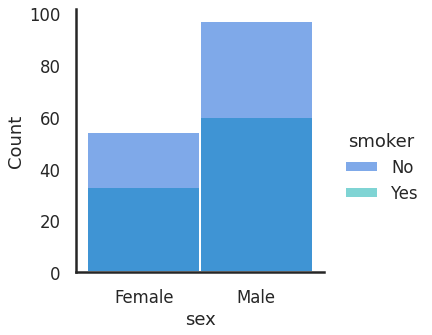

In [12]:
sns.displot(x="sex", hue="smoker", data=dataset, palette="winter")
plt.show()

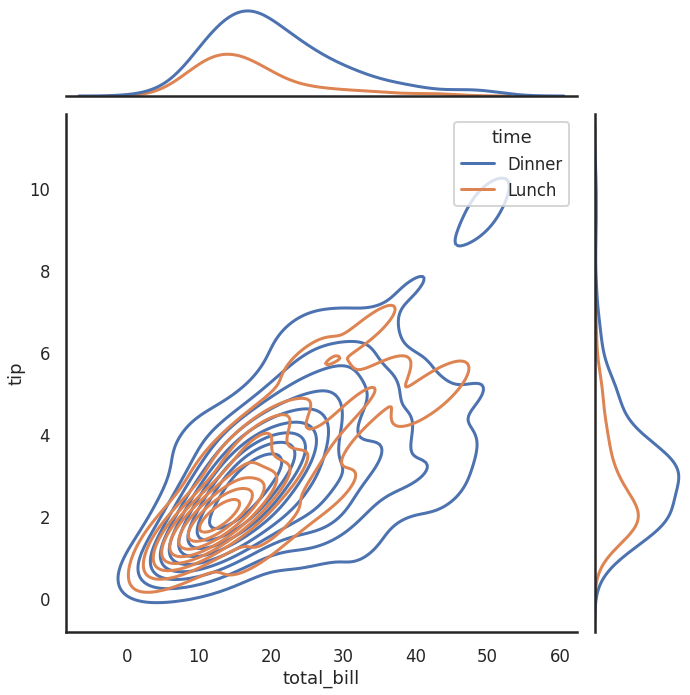

In [13]:
sns.jointplot(x="total_bill", y="tip", hue="time", data=dataset, kind="kde", height=10)
plt.show()

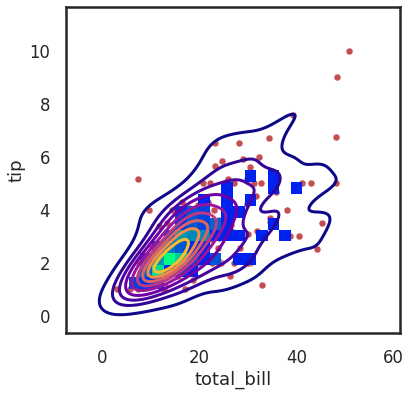

In [14]:
f, ax = plt.subplots(figsize=(6, 6))

sns.scatterplot(x="total_bill", y="tip", data=dataset, s=50, color="r")
sns.histplot(x="total_bill", y="tip", data=dataset, bins=20, pthresh=0.1, cmap="winter")
sns.kdeplot(x="total_bill", y="tip", data=dataset, cmap="plasma")

plt.show()

In [15]:
for column in ["sex", "day", "smoker", "time"]:
    dataset[column] = pd.Categorical(dataset[column])
    dataset[column] = dataset[column].cat.codes

dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [16]:
dataset.drop(["day", "time", "sex"], axis=1).describe()

,total_bill,tip,smoker,size
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.381148,2.569672
std,8.902412,1.383638,0.486667,0.951100
min,3.070000,1.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,2.000000
50%,17.795000,2.900000,0.000000,2.000000
75%,24.127500,3.562500,1.000000,3.000000
max,50.810000,10.000000,1.000000,6.000000


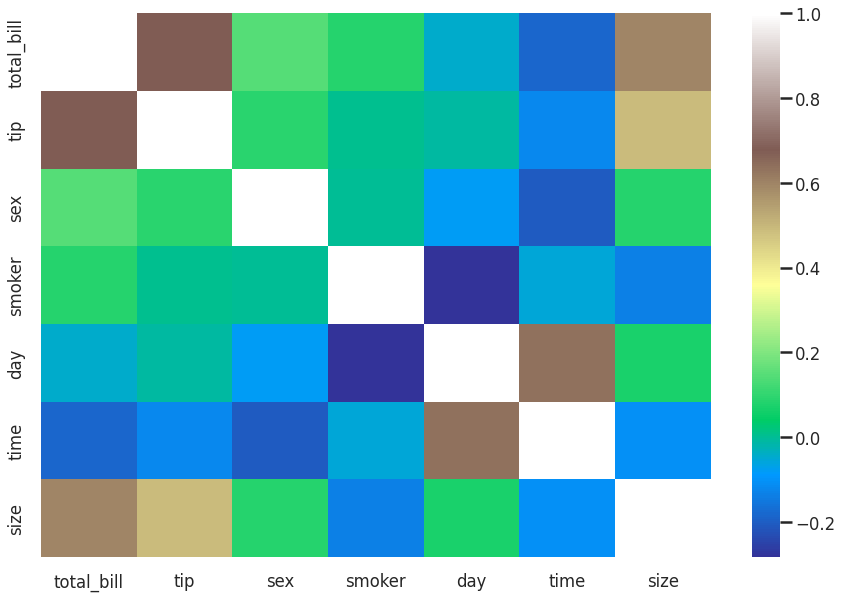

In [17]:
plt.figure(figsize=(15, 10))
sns.heatmap(dataset.corr(), cmap="terrain")
plt.show()